In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("C:/Users/nikau/OneDrive/Desktop/IOD/Capstone Project/car_price_prediction.csv")

### Data Cleaning & Feature Engineering

In [3]:
# checking for any duplications

print(f'duplicated rows = {df.duplicated().sum()} ')

duplicated rows = 313 


In [4]:
df.loc[df.duplicated()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(18924, 18)

There are 313 duplicated rows present in the data. These duplications are not required and can be removed to only keep the true values.

there are now 18924 columsn x 18 rows now that the duplications are removed.

In [7]:
df['Car Model'] = df['Manufacturer']+' '+ df['Model']

I have combined the 'Manufacturer' and 'Model' columns together and created a new column called the 'Car Model. I have decided to merge to columns together so to reduce the amount of columns in the data set by one. This also puts the vehicle entire name into a single column rather than split in two, having less columns will increase the performance on the machine learning model.

In [8]:
df['Turbo'] = df['Engine volume'].str.contains('turbo')

Finding the rows which has turbo in them and assigning the results to new column Turbo

In [9]:
df['Age'] = 2022 - df['Prod. year']

In [10]:
df = df.drop(['ID', 'Manufacturer','Model'],axis = 1)

Removing the 'ID', 'Manufacturer' abd 'Model' now because they are not needed. ID does not provide any information

In [11]:
df.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Turbo,Age
0,13328,1399,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,LEXUS RX 450,False,12
1,16621,1018,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,CHEVROLET Equinox,False,11
2,8467,-,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,HONDA FIT,False,16
3,3607,862,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,FORD Escape,False,11
4,11726,446,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,HONDA FIT,False,8


In [12]:
# checking for wrong entries such as special symbols e.g -,?,*,#,$ etc.


for col in df.columns:
    print('{} : {}'.format(col, df[col].unique()))

Price : [13328 16621  8467 ... 56814 63886 22075]
Levy : ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353

There are two characters present, one in levy column with '_' and one in the Doors column with '>'

In the 'engine volume' column, some of the values has turbo and some doesn't so we will split and remove the turbo so it will remain the numbers alone

In [13]:
print(f'Data Contains {df.shape[0]} rows , {df.shape[1]} columns')

Data Contains 18924 rows , 18 columns


In [14]:
# mileage I am going replace the 'km' text with blank space leaving it as a number, then changing the data type to an integer

df['Mileage'] = df['Mileage'].apply(lambda x : str(x).replace("km"," "))
df['Mileage'] = df['Mileage'].astype(str).astype(int)

# engine volume replacing the 'Turbo' text and leaving as a blank speace, then changing the data type to integer

df['Engine volume'] = df['Engine volume'].str.replace("Turbo", " ")
df['Engine volume'] = df['Engine volume'].astype(str).astype(float)

# levy replacing the '-' text to leave as blank, then changing the data type to integer

df['Levy'] = df['Levy'].apply(lambda x: str(x).replace("-","0"))
df['Levy'] = df['Levy'].astype(str).astype(int)

# replacing the '-' abd '>' symbols and changing the data type to integer

df['Doors']= df['Doors'].replace({'04-May':4,'02-Mar':2})
df['Doors']=df['Doors'].astype(str)
df['Doors']=df['Doors'].str.split('-').str[0]
df['Doors']=df['Doors'].replace('>5',5)
df['Doors']=df['Doors'].astype(int)

# df['Leather']= df['Leather'].replace({'Yes':1,'No':0})
df['Leather interior']= df['Leather interior'].replace({'Yes':1,'No':0})

# df['Turbo']= df['Turbo'].replace({'True':1,'False':0})
df["Turbo"] = df["Turbo"].astype(int)

In [15]:
# data set after cleaning is done

df.head()

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Turbo,Age
0,13328,1399,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,LEXUS RX 450,0,12
1,16621,1018,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,CHEVROLET Equinox,0,11
2,8467,0,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,HONDA FIT,0,16
3,3607,862,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,FORD Escape,0,11
4,11726,446,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,HONDA FIT,0,8


<AxesSubplot:>

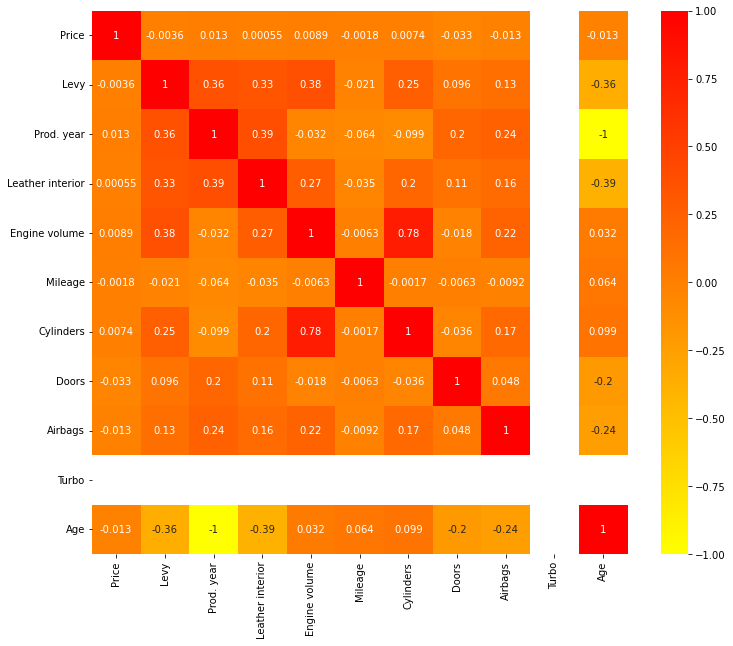

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='autumn_r')

### Removing Outliers

<AxesSubplot:xlabel='Mileage'>

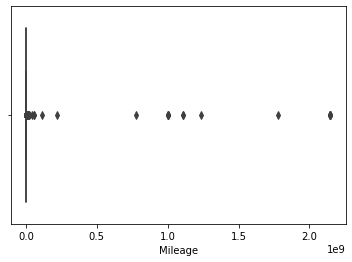

In [17]:
sns.boxplot(data = df, x = 'Mileage')

<AxesSubplot:xlabel='Levy'>

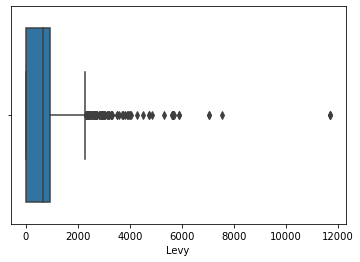

In [18]:
sns.boxplot(data = df, x = 'Levy')

<AxesSubplot:xlabel='Prod. year'>

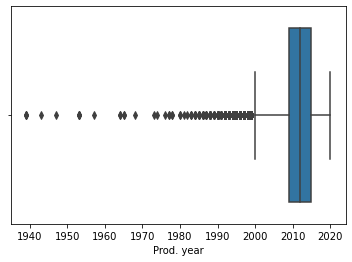

In [19]:
sns.boxplot(data = df, x = 'Prod. year')

<AxesSubplot:xlabel='Cylinders'>

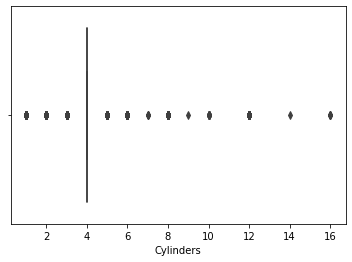

In [20]:
sns.boxplot(data = df, x = 'Cylinders')

In [21]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5 * IQR
neg_outlier = Q1 - 1.5 * IQR

In [22]:
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\nikau\AppData\Local\Temp/ipykernel_6940/3382395134.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot:xlabel='Mileage'>

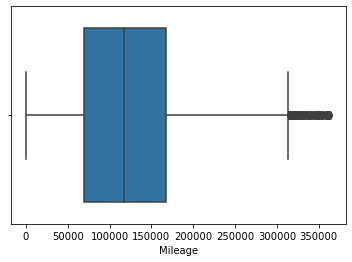

In [23]:
sns.boxplot(data = df, x = 'Mileage')

<AxesSubplot:xlabel='Levy'>

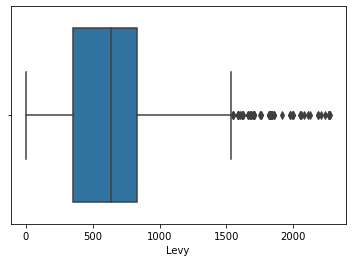

In [24]:
sns.boxplot(x ='Levy', data= df)

<AxesSubplot:xlabel='Prod. year'>

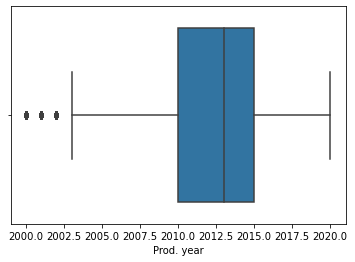

In [25]:
sns.boxplot(data = df, x = 'Prod. year')

### Encoding Categorical Features

In [26]:
encode=LabelEncoder()


for feature in ['Category','Fuel type','Gear box type','Drive wheels', 'Wheel', 'Color', 'Car Model']:
    df[feature]=encode.fit_transform(df[feature])

In [27]:
df

,Price,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Turbo,Age
2,8467,0,2006,3,0,4,1.3,200000,4.0,3,1,4,1,1,2,204,0,16
3,3607,862,2011,4,1,2,2.5,168966,4.0,0,0,4,0,14,0,137,0,11
4,11726,446,2014,3,1,4,1.3,91901,4.0,0,1,4,0,12,4,204,0,8
5,39493,891,2016,4,1,1,2.0,160931,4.0,0,1,4,0,14,4,271,0,6
6,1803,761,2010,3,1,2,1.8,258909,4.0,0,1,4,0,14,12,736,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,470,645,2011,3,1,2,1.8,307325,4.0,0,1,4,0,12,12,736,0,11
19233,15681,831,2011,8,1,4,2.4,161600,4.0,2,1,4,0,11,8,274,0,11
19234,26108,836,2010,4,1,1,2.0,116365,4.0,0,1,4,0,7,4,292,0,12
19235,5331,1288,2007,4,1,1,2.0,51258,4.0,0,1,4,0,1,4,62,0,15


#### **Splitting into Train set and Test set**

In [28]:
x = df.drop('Price', axis=1)
y = df['Price']

In [29]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0) 

In [30]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (9526, 17)
X_test: (2382, 17)
Y_train: (9526,)
Y_test: (2382,)


In [31]:

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
x.head(3)

,Levy,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Car Model,Turbo,Age
2,0,2006,3,0,4,1.3,200000,4.0,3,1,4,1,1,2,204,0,16
3,862,2011,4,1,2,2.5,168966,4.0,0,0,4,0,14,0,137,0,11
4,446,2014,3,1,4,1.3,91901,4.0,0,1,4,0,12,4,204,0,8


In [33]:
y.head(3)

2     8467
3     3607
4    11726
Name: Price, dtype: int64

#### **Model Formation**

In [142]:
# Create Model

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [156]:
def view_coeff(x, lr):
    model_coefs = pd.DataFrame({'variable': x.columns,
                                'coef': lr.coef_,
                                'abs_coef': np.abs(lr.coef_)})
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    sns.barplot(x="variable", y="coef", data=model_coefs)

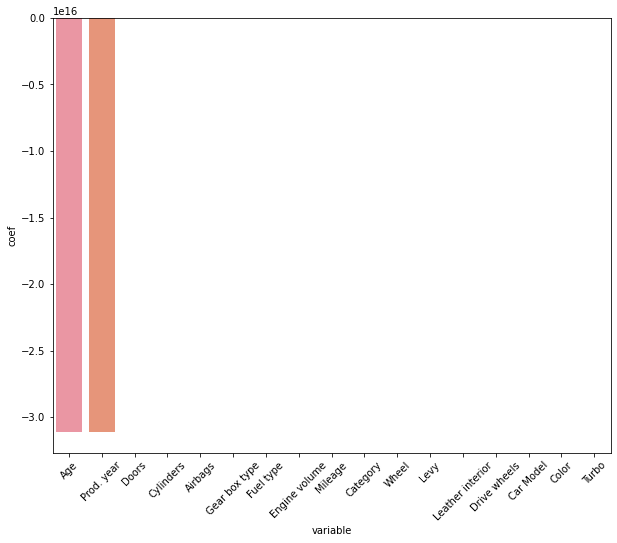

In [157]:
# Plot Coefficients
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
view_coeff(x, lr)

This bar graph represents which of the features have to most influence on the model:

- Prod. year has the most importance which makes sense since it is the biggest factor to consider when estimating the price
- Engine volume and Airbags have more significance than the Mileage and Fuel type

In [158]:
# we will need to determine the best of parameter for the model using the gridsearchcv

In [159]:
parameter = {"fit_intercept":[True, False],
             "normalize":[True, False]}

lr_cv = GridSearchCV(lr, parameter, scoring='r2', cv=5)
lr_cv.fit(x_train, y_train)

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='r2')

In [160]:
# trying to find the best possible parameters to use in the model

lr_cv.best_params_

{'fit_intercept': True, 'normalize': True}

In [161]:

lr_cv_predict = lr_cv.predict(x_test)
score = r2_score(y_true=y_test, y_pred=lr_cv_predict)

score

0.22338599942550041

In [162]:
y_pred_linear = lr_cv.predict(x_test)

In [163]:
linear_mae = mean_absolute_error(y_test, y_pred_linear, multioutput='raw_values')
print('Mean Absolute Error Value is : ', linear_mae)

linear_mse = mean_squared_error(y_test, y_pred_linear, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(linear_mse))

Mean Absolute Error Value is :  [7874.18519319]
Mean Squared Error Value by Square root is :  [9968.27538609]


#### **Ridge Regression**

In [164]:
ridge=Ridge()

In [165]:
# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    ridge.set_params(alpha = a)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
    errors.append(mean_squared_error(ridge.coef_, ridge.coef_))

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.54659e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.77704e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.04177e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.34598e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:21

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.02686e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.47772e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.99573e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.59089e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:21

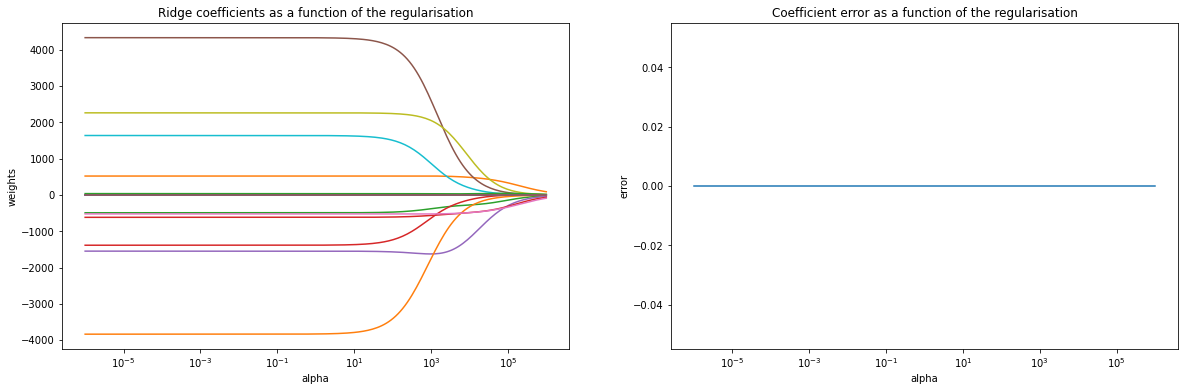

In [166]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

- The ridge regression will penalize your coefficients, such that those that are the least effective in your estimation will "shrink" the fastest.
- I would say though the faster a coefficient is shrinking the less important it is in prediction;

In [167]:
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(x, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(x, y))

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.71583e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.72422e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.71454e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.72155e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:21

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.00042e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.98089e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.99351e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.43572e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:21

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.01599e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.98219e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.00694e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.99623e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:21

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.04248e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.0468e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.04492e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.05325e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.82692e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.81665e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.82419e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.82092e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:21

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.16576e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.1789e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.1732e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.19853e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212:

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.504e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.52746e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.34447e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.37431e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212:

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.59145e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.63234e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.10561e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.11081e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:21

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.94478e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.92339e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.93314e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.9204e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.36082e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.8576e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.87572e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.85394e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.7109e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.74492e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.70047e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=6.72904e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.35228e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.34468e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.35027e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.34784e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:21

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.7202e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.69027e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.70391e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.68609e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.40324e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.44638e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.38646e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.41376e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:21

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.0793e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.08378e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.08184e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.09047e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212

Alpha: 7.488103857590015
Score: 0.23752484749199787


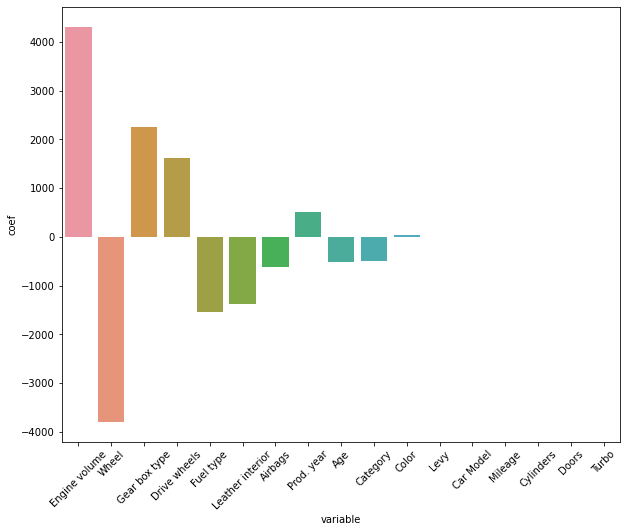

In [168]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
view_coeff(x, optimal_ridge)

In [169]:
# cross validation

parameter={
    'alpha':[ 1 ,0.5, 0.1, 0.01,5 , 10, 50,100]
}

ridge_cv=GridSearchCV(ridge,parameter,scoring='r2',cv=5)
ridge_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(alpha=1000000.0),
             param_grid={'alpha': [1, 0.5, 0.1, 0.01, 5, 10, 50, 100]},
             scoring='r2')

In [170]:
ridge_cv_predict = ridge_cv.predict(x_test)
score = r2_score(y_true=y_test, y_pred=ridge_cv_predict)

score

0.22359236899652357

In [171]:
y_pred_ridge = ridge_cv.predict(x_test)

In [172]:
ridge_mae = mean_absolute_error(y_test, y_pred_ridge, multioutput='raw_values')
print('Mean Absolute Error Value is : ', linear_mae)

ridge_mse = mean_squared_error(y_test, y_pred_ridge, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(ridge_mse))

Mean Absolute Error Value is :  [7874.18519319]
Mean Squared Error Value by Square root is :  [9966.95086361]


#### **Lasso Regression** 

In [173]:
lasso = Lasso()

In [174]:
parameter={
    'alpha':[ 1 ,0.5, 2, 0.01, 5 , 10, 50, 100]
}

lasso_cv=GridSearchCV(lasso,parameter,scoring='r2',cv=5)
lasso_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 0.5, 2, 0.01, 5, 10, 50, 100]},
             scoring='r2')

In [175]:
lasso_cv_predict = lasso_cv.predict(x_test)
score = r2_score(y_true=y_test, y_pred=lasso_cv_predict)

score

0.2233863387205114

In [176]:
y_pred_lasso = lasso_cv.predict(x_test)

In [177]:
lasso_mae = mean_absolute_error(y_test, y_pred_lasso, multioutput='raw_values')
print('Mean Absolute Error Value is : ', lasso_mae)

lasso_mse = mean_squared_error(y_test, y_pred_lasso, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(lasso_mse))

Mean Absolute Error Value is :  [7874.18324052]
Mean Squared Error Value by Square root is :  [9968.27320857]


In [178]:
# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    lasso.set_params(alpha = a)
    lasso.fit(x, y)
    coefs.append(lasso.coef_)
    errors.append(mean_squared_error(lasso.coef_, lasso.coef_))                                                                                                                       

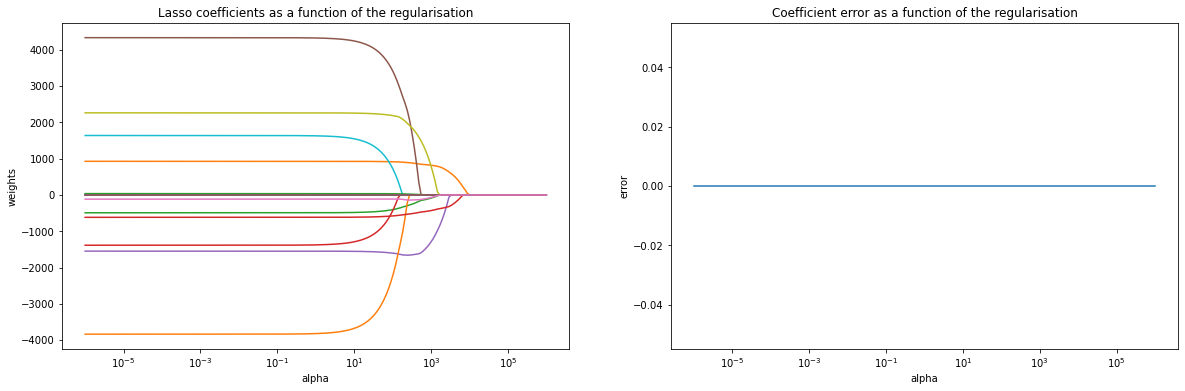

In [179]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularisation')
plt.axis('tight')

plt.show()

Lasso regression has a very similar approach to Ridge, except the difference in Lasso is that it tends to make coefficients to absolute zero. As compared to Ridge which will never set the value of coefficient to absolute zero

In [182]:
optimal_lasso = LassoCV(alphas=ridge_alphas, cv=10)
optimal_lasso.fit(x, y)

print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(x, y))

C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1071756165.4328613, tolerance: 137483222.83652446
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 840906755.2264404, tolerance: 137483222.83652446
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3240109354.772461, tolerance: 137483222.83652446
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634

Alpha: 1e-06
Score: 0.2375261289788737


C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51225204478.6272, tolerance: 137253846.96227452
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90172283050.2987, tolerance: 137253846.96227452
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71014377538.06897, tolerance: 137253846.96227452
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: C

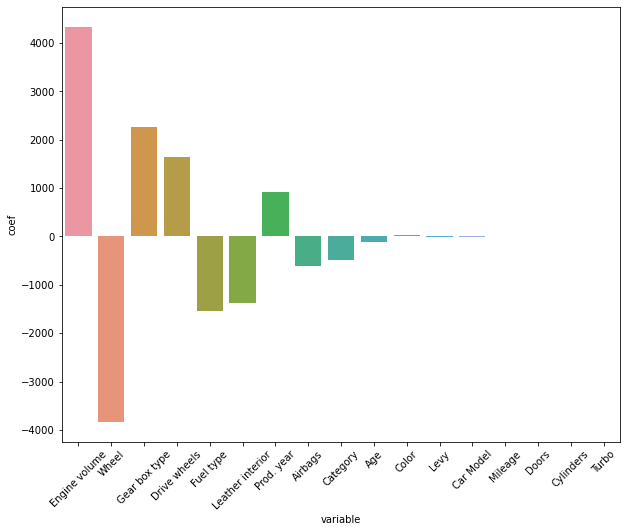

In [184]:
# Plot Coefficient
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
view_coeff(x, optimal_lasso)       


- Same as the Ridge model engine volume is the most important feature

### Compare the residuals for the Ridge and Lasso visually

In [185]:
# Build the ridge and lasso using optimal alpha
ridger = Ridge(alpha=optimal_ridge.alpha_)
lassoer = Lasso(alpha=optimal_lasso.alpha_)

# fit the Lasso and Ridge outside of cross_val_score
print(ridger.fit(x,y))
print(lassoer.fit(x,y))

Ridge(alpha=7.488103857590015)
Lasso(alpha=1e-06)


In [186]:
# model residuals:
ridge_resid = y - ridger.predict(x)
lasso_resid = y - lassoer.predict(x)

C:\Users\nikau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x720 with 0 Axes>

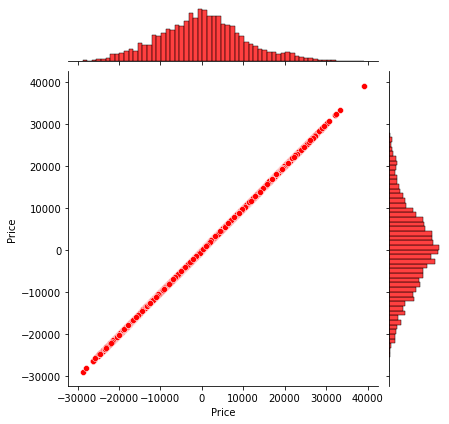

In [187]:
# Jointplot
plt.figure(figsize=(15,10))
sns.jointplot(ridge_resid, lasso_resid, color='red');

### Gradient Boosting 

In [188]:
booster = GradientBoostingRegressor(n_estimators=150,
                                    max_depth=7,
                                    learning_rate = 0.15,
                                    random_state=33)

booster.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.15, max_depth=7, n_estimators=150,
                          random_state=33)

In [189]:
print('Gradient Boosting Train Score is : ' , booster.score(x_train, y_train))
print('Gradient Boosting Test Score is : ' , booster.score(x_test, y_test))

Gradient Boosting Train Score is :  0.9459205449356465
Gradient Boosting Test Score is :  0.7576063631265831


In [190]:
prediction = booster.predict(x_test)
score = r2_score(y_true = y_test, y_pred = prediction)
score

0.7576063631265831

In [191]:
y_pred_gb = booster.predict(x_test)
gb_mae = mean_absolute_error(y_test, y_pred_gb, multioutput='raw_values')
print('Mean Absolute Error Value is : ', gb_mae)

gb_mse = mean_squared_error(y_test, y_pred_gb, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(gb_mse))

Mean Absolute Error Value is :  [3580.41562933]
Mean Squared Error Value by Square root is :  [5569.01037588]


### Ada Boost

In [192]:
ada = AdaBoostRegressor(n_estimators=150,learning_rate = 0.15,random_state=33)


In [193]:
parameter = {
          'n_estimators': [100, 200, 300, 1000],
          'learning_rate': [0.5, 1.0, 1.5, 3.0]
}

ada_cv = GridSearchCV(ada,parameter,scoring='r2',cv=5)
ada_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(learning_rate=0.15, n_estimators=150,
                                         random_state=33),
             param_grid={'learning_rate': [0.5, 1.0, 1.5, 3.0],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='r2')

In [194]:
print("AdaBoost Training Score is : ", ada_cv.score(x_train,y_train))
print("AdaBoost Testing Score is : ", ada_cv.score(x_test,y_test))

AdaBoost Training Score is :  0.4594840265236466
AdaBoost Testing Score is :  0.4394205227212149


In [195]:
prediction = ada_cv.predict(x_test)
score = r2_score(y_true = y_test, y_pred = prediction)
score

0.4394205227212149

In [196]:
y_pred_ada = ada_cv.predict(x_test)
ada_mae = mean_absolute_error(y_test, y_pred_ada, multioutput='raw_values')
print('Mean Absolute Error Value is : ', ada_mae)

ada_mse = mean_squared_error(y_test, y_pred_ada, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(ada_mse))

Mean Absolute Error Value is :  [6862.59019595]
Mean Squared Error Value by Square root is :  [8469.07573807]


###  Random Forest Regressor

In [200]:
random_f = RandomForestRegressor(random_state=0)

In [201]:
parameter = {
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300, 1000]
}

random_f_cv = GridSearchCV(random_f,parameter,scoring='r2',cv=5)
random_f_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_features': [2, 3],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='r2')

In [202]:
prediction = random_f_cv.predict(x_test)
score = r2_score(y_true = y_test, y_pred = prediction)
score

0.7729560062427179

In [203]:
print('Random Forest Train Score is : ' , random_f_cv.score(x_train, y_train))
print('Random Forest Test Score is : ' , random_f_cv.score(x_test, y_test))

Random Forest Train Score is :  0.970302555493042
Random Forest Test Score is :  0.7729560062427179


In [204]:
y_pred_rf = random_f_cv.predict(x_test)
rf_mae = mean_absolute_error(y_test, y_pred_rf, multioutput='raw_values')
print('Mean Absolute Error Value is : ', rf_mae)

rf_mse = mean_squared_error(y_test, y_pred_rf, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(rf_mse))

Mean Absolute Error Value is :  [3380.48680995]
Mean Squared Error Value by Square root is :  [5389.79724857]


### XGBoost Regressor

In [216]:
xg_boost = xgb.XGBRegressor()

In [217]:
parameters = {
    'n_estimators': [50, 100, 150, 200, 500],
    'max_depth': [2, 5, 10, 25, 50 ],
     'eta': [0.1, 0.2],
#     'subsample': [0.2, 0.4, 0.6, 0.8, 10],
#     'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 10]
    
}

In [218]:
xg_boost_cv = GridSearchCV(xg_boost,parameters,scoring='r2',cv=2)
xg_boost_cv.fit(x_train, y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'eta': [0.1, 0.2], 'max_depth': [2, 5, 10, 25, 50],
                         'n_estimators': [50, 100, 150, 200, 500]},
             scoring='r2')

In [219]:
print('XGB Regressor Train Score is: ', xg_boost_cv.score(x_train, y_train))
print('XGB Regressor Test Score is: ', xg_boost_cv.score(x_test, y_test))

XGB Regressor Train Score is:  0.9090603796147323
XGB Regressor Test Score is:  0.7607986052761775


In [220]:
y_pred_xgb = xg_boost_cv.predict(x_test)
xgb_mae = mean_absolute_error(y_test, y_pred_xgb, multioutput='raw_values')
print('Mean Absolute Error Value is : ', xgb_mae)

xgb_mse = mean_squared_error(y_test, y_pred_xgb, multioutput='raw_values')
print('Mean Squared Error Value by Square root is : ', np.sqrt(xgb_mse))

Mean Absolute Error Value is :  [3624.85350645]
Mean Squared Error Value by Square root is :  [5532.21784732]


In [221]:
# RIDGE REGRESSION MODEL
y_pred_ridge - ridge_cv.predict(x_test)

# LASSO REGRESSION MODEL
y_pred_lasso = lasso_cv.predict(x_test)

# LINEAR REGRESSION MODEL
y_pred_linear = lr_cv.predict(x_test)

# ADA BOOST MODEL
prediction = ada_cv.predict(x_test)

# GRADIENT BOOST MODEL
y_pred_gb = booster.predict(x_test)


# RANDOM FOREST
y_pred_rf = random_f_cv.predict(x_test)

# XG BOOST MODEL
y_pred_xgb = xg_boost_cv.predict(x_test)

predictions = {
    "Linear Regression": y_pred_linear,
    "Ridge Regression": y_pred_ridge,
    "Lasso Regression": y_pred_lasso,           
    "Ada Boost" : prediction,
    "Gradient Boost": y_pred_gb,
    "Random Forest": y_pred_rf,
    "XG Boost": y_pred_xgb
         }

In [222]:
def get_scores(predictions, y_test):
    model_score = {}
    for name, value in predictions.items():
        model_score[name] = r2_score(y_true=y_test, y_pred=value)
    return model_score

In [223]:
summary = get_scores(predictions, y_test)
summary = pd.DataFrame([summary])
summary = summary.melt(var_name="Models", value_name="R2 Scores")

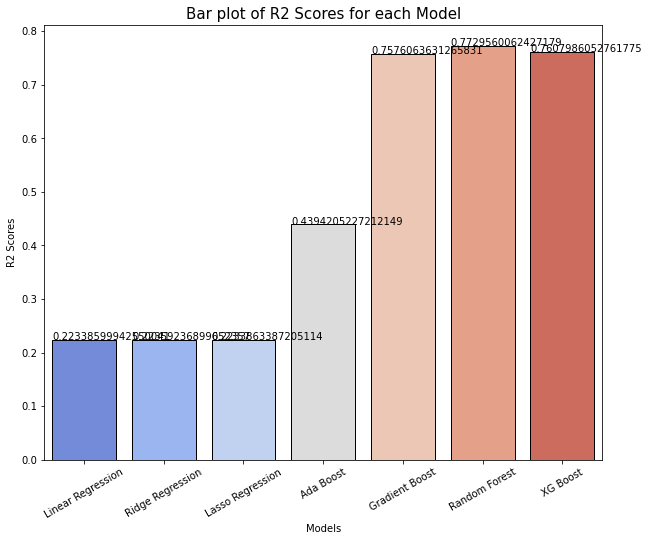

In [224]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=summary, x=summary['Models'], y=summary["R2 Scores"], edgecolor='black', ci='sd', palette='coolwarm')


for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1, p.get_height()*1)),
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, horizontalalignment='center')
    plt.title('Bar plot of R2 Scores for each Model', fontsize=15)       

